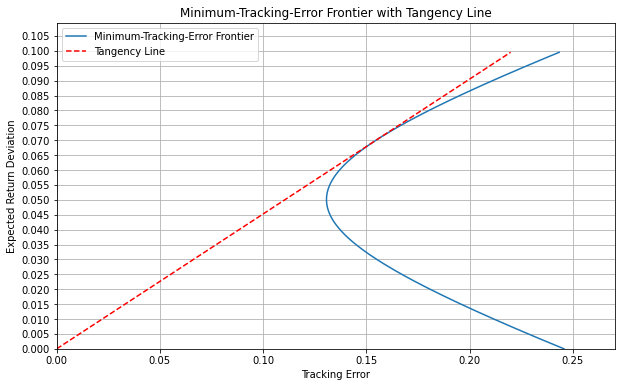

Information Ratio of Tangency Portfolio: 0.452488
Portfolio Weights for the Tangency Portfolio:
NoDur: 5.26%
Durbl: 0.02%
Manuf: 13.76%
Enrgy: 8.70%
HiTec: 17.94%
Telcm: 7.11%
Shops: 10.69%
Hlth: 10.28%
Utils: 4.02%
Other: 22.23%


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")
market_returns = pd.read_excel(
    "/Users/gabriel/Library/Mobile Documents/com~apple~CloudDocs/SMU Masters /QF600 Asset Pricing/Assignments/Market_Portfolio.xlsx",
    index_col='Date',
    parse_dates=True
)
industry_returns = pd.read_excel(
    "/Users/gabriel/Library/Mobile Documents/com~apple~CloudDocs/SMU Masters /QF600 Asset Pricing/Assignments/Industry_Portfolios.xlsx",
    index_col='Date',
    parse_dates=True
)

industry_returns = industry_returns.loc[market_returns.index]
market_returns['Market'] = market_returns['Market'] / 100.0
industry_returns = industry_returns / 100.0
deviations = industry_returns.subtract(market_returns['Market'], axis=0)

Ri = deviations.mean(axis=0)
Ri_array = Ri.values.reshape(-1, 1)
V = deviations.cov()
V_array = V.values
V_inv = np.linalg.inv(V_array)
ones = np.ones((10, 1))

# Compute scalar values A, B, C, D
delta = float(ones.T @ V_inv @ ones) 
alpha = float(ones.T @ V_inv @ Ri_array)
zeta = float(Ri_array.T @ V_inv @ Ri_array)
denom = A * C - B ** 2

mu_values = np.arange(0, 0.0010, 0.000005)
sigma_p = []
expected_return_deviation = []

for mu in mu_values:
    numerator = (zeta - alpha * mu) * ones + (delta * mu - alpha) * Ri_array
    w = V_inv @ numerator / D
    E_delta_Rp = float(w.T @ Ri_array)
    sigma_squared = float(w.T @ V_array @ w)
    sigma = np.sqrt(sigma_squared)
    expected_return_deviation.append(E_delta_Rp)
    sigma_p.append(sigma)

sigma_p_percent = [sigma * 100 for sigma in sigma_p]
expected_return_deviation_percent = [erd * 100 for erd in expected_return_deviation]

w_tangency_numerator = V_inv @ Ri_array
w_tangency_denominator = float(ones.T @ V_inv @ Ri_array)
w_tangency = w_tangency_numerator / w_tangency_denominator

E_delta_Rp_tangency = float(w_tangency.T @ Ri_array)
sigma_tangency_squared = float(w_tangency.T @ V_array @ w_tangency)
sigma_tangency = np.sqrt(sigma_tangency_squared)

IR_tangency = E_delta_Rp_tangency / sigma_tangency

# Convert tangency portfolio values to percentages
E_delta_Rp_tangency_percent = E_delta_Rp_tangency * 100
sigma_tangency_percent = sigma_tangency * 100


E_delta_Rp_max = max(expected_return_deviation)
E_delta_Rp_max_percent = E_delta_Rp_max * 100


sigma_max_on_tangent = E_delta_Rp_max / IR_tangency
sigma_max_on_tangent_percent = sigma_max_on_tangent * 100

x_line = [0, sigma_max_on_tangent_percent]
y_line = [0, E_delta_Rp_max_percent]

# Plot the Minimum-Tracking-Error Frontier
plt.figure(figsize=(10, 6))
plt.plot(sigma_p_percent, expected_return_deviation_percent, label='Minimum-Tracking-Error Frontier')
plt.plot(x_line, y_line, 'r--', label='Tangency Line')
plt.xlabel('Tracking Error')
plt.ylabel('Expected Return Deviation')
plt.ylim(0, E_delta_Rp_max_percent * 1.1)
plt.xlim(0, max(sigma_p_percent) * 1.1)
plt.yticks(np.arange(0, E_delta_Rp_max_percent * 1.1, 0.005))
plt.title('Minimum-Tracking-Error Frontier with Tangency Line')
plt.grid(True)
plt.legend()
plt.show()

w_tangency_percent = w_tangency.flatten() * 100
industry_names = industry_returns.columns.tolist()
print(f"Information Ratio of Tangency Portfolio: {IR_tangency:.6f}")
print("Portfolio Weights for the Tangency Portfolio:")
for industry, weight in zip(industry_names, w_tangency_percent):
    print(f"{industry}: {weight:.2f}%")


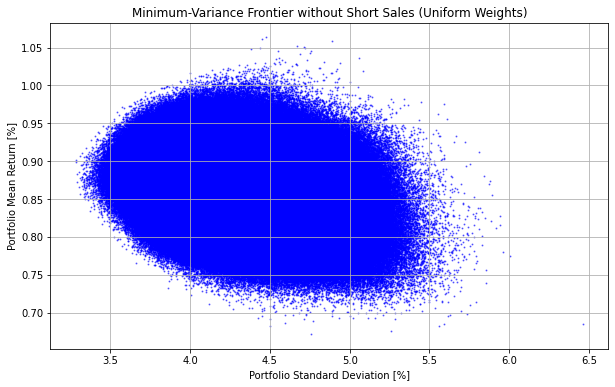

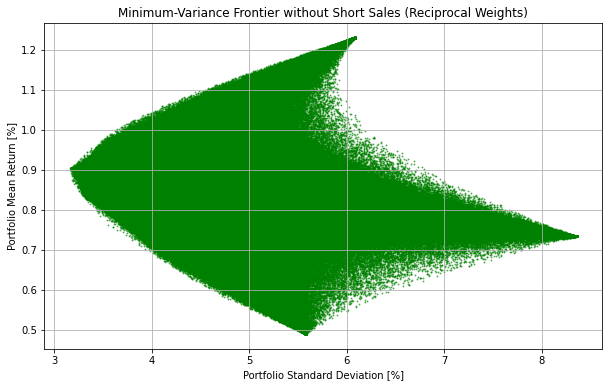

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

market_returns = pd.read_excel("/Users/gabriel/Library/Mobile Documents/com~apple~CloudDocs/SMU Masters /QF600 Asset Pricing/Assignments/Market_Portfolio.xlsx", index_col='Date', parse_dates=True)
industry_returns = pd.read_excel("/Users/gabriel/Library/Mobile Documents/com~apple~CloudDocs/SMU Masters /QF600 Asset Pricing/Assignments/Industry_Portfolios.xlsx", index_col='Date', parse_dates=True)
industry_returns = industry_returns.loc[market_returns.index]
industry_returns = industry_returns / 100.0

Ri = industry_returns.mean().values.reshape(-1, 1)
V = industry_returns.cov().values
num_simulations = 10000
num_assets = 10
portfolio_returns = np.zeros(num_simulations)
portfolio_std_devs = np.zeros(num_simulations)

for i in range(num_simulations):
    weights = np.random.uniform(0, 1, num_assets)
    weights /= np.sum(weights)
    portfolio_return = np.dot(weights, Ri.flatten())
    portfolio_std_dev = np.sqrt(weights @ V @ weights.T)
    portfolio_returns[i] = portfolio_return
    portfolio_std_devs[i] = portfolio_std_dev

plt.figure(figsize=(10, 6))
plt.scatter(portfolio_std_devs * 100, portfolio_returns * 100, s=1, alpha=0.5, color='blue')
plt.xlabel('Portfolio Standard Deviation [%]')
plt.ylabel('Portfolio Mean Return [%]')
plt.title('Minimum-Variance Frontier without Short Sales (Uniform Weights)')
plt.grid(True)
plt.show()

epsilon = 1e-6

portfolio_returns_reciprocal = np.zeros(num_simulations)
portfolio_std_devs_reciprocal = np.zeros(num_simulations)

for i in range(num_simulations):
    u = np.random.uniform(epsilon, 1, num_assets)
    weights = 1 / u
    weights /= np.sum(weights)
    portfolio_return = np.dot(weights, Ri.flatten())
    portfolio_std_dev = np.sqrt(weights @ V @ weights.T)
    portfolio_returns_reciprocal[i] = portfolio_return
    portfolio_std_devs_reciprocal[i] = portfolio_std_dev
    
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_std_devs_reciprocal * 100, portfolio_returns_reciprocal * 100, s=1, alpha=0.5, color='green')
plt.xlabel('Portfolio Standard Deviation [%]')
plt.ylabel('Portfolio Mean Return [%]')
plt.title('Minimum-Variance Frontier without Short Sales (Reciprocal Weights)')
plt.grid(True)
plt.show()
